In [1]:
from prysm.geometry import cart_to_polar, gaussian
from prysm.coordinates import make_xy_grid
from prysm.propagation import angular_spectrum, Wavefront
import numpy as np
from obv_hss import zernike
import matplotlib.pyplot as plt
zernike.zernike_gen.generate_cache("zcache")

Zernike const in dx is  0.0
Zernike const in dx is  2.0


-0.1 mm
0.14142135623730953


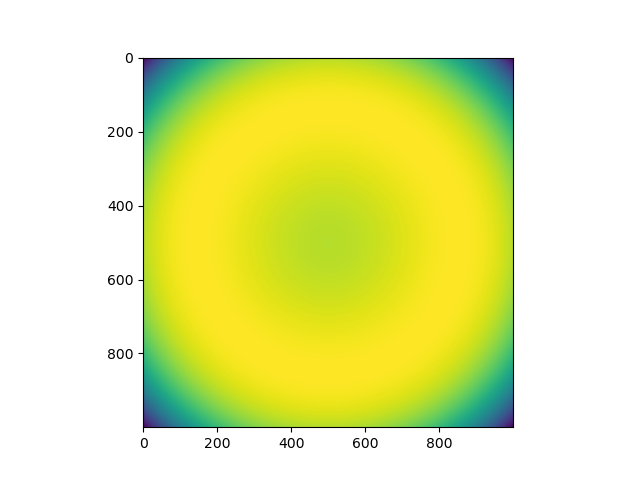

1.4146524970818806 mm


In [161]:
z = zernike.zernikes.load("zcache", zernike.zernikes.h())
x, y = make_xy_grid((200, 200), dx=1e-3)
print(np.min(x), "mm")
mla_phase = -1e3*z[4](x/np.max(x), y/np.max(y)) + np.random.uniform(-20, 20, x.shape)# + 1e3*z[2](x/0.25, y/0.25)
mla_phase[x**2 + y**2 > np.max(x)**2] = 0
mla_phase = np.tile(mla_phase, (5, 5))


amplitude = np.ones_like(mla_phase)

xm, ym = make_xy_grid(mla_phase.shape, dx=1e-3)
measure_phase = -1e4*z[12](xm/np.max(xm), ym/np.max(ym))
#amplitude[x**2 + y**2 > 0.50**2] = 0
print(np.sqrt(np.max(x**2 + y**2)))
plt.clf()
plt.imshow(measure_phase)
plt.show()
s, _, _ = zernike.zernikes.zernike_to_sza([0, 0, 0, 0, -1, 0, 0], np.max(x))
print(1/s * 1e3, "mm")

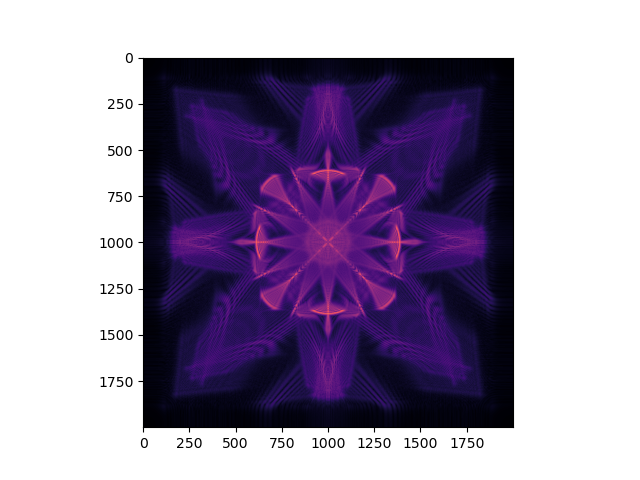

In [162]:
%matplotlib widget
plt.clf()
field = Wavefront.from_amp_and_phase(amplitude, measure_phase, 633e-3, 1e-3)#amplitude*np.exp(-1j*phase)
mla_field = Wavefront.from_amp_and_phase(1, mla_phase, 633e-3, 1e-3)
field2 = field * mla_field
result = field.free_space(1.3, Q=2)
result2 = field2.free_space(1.3, Q=2)
#result2.data[result2.data < 0.3] = 0
plt.imshow(result2.intensity.data**0.3, cmap='magma')
plt.show()